# Supervised Learning with `scikit-learn`

## Classification

### What is Machine Learning?

* The art and science of:
    + Giving computers the ability to learn to make decisions from data without being explicitly programmed
* Examples:
    + Learning to predict whether email is content or spam given the sender
    + Clustering wikipedia entries into different categories
* **Supervised Learning**: labels data cases are given
* **Unsupervised Learning**: data is not labeled

#### Unsupervised Learning
* Uncerver hidden patterns from unlabeled data
* Example:
    + Grouping customers into distinct categories (clustering) withou knowledge of what the categories might be.

#### Reinforcement Learning
* Software agents interact with the enironment
    + Automatically learn how to optimize behaviors given a system of rewards and punishments
    + Draws inspiration from behavioral psychology
* Applications
    + Economics
    + Genetics
    + Game playing
* Example:
    + **AlphaGo**: first computer to defeat the world champion in Go was develoed with Reinforcement Learning methods

### Supervised Learning
* Predictor varaibles/features and a target variable
* **AIM**: predict the target variable, given the predictor variables
    + **Classification**: categorical target variable
    + **Regression**: continuous target variable
* Automate time-consuming or expensive manual tasks
    + Example: Doctor's diagnosis
* Make predictions about the future
    + Example: Will a customer click on an ad or not?
* Supervised Learning **Needs** labeled data
    + Historical Data with labels
    + Experiments to generate labelled data (e.g. A/B testing)
    + Crowd-sourced labeled data

#### Naming Conventions
* Features == predictor variables == independent variables
* Target variable == dependent variable == response variable

#### Supervised Learning with `Python`
* We will use `scikit-learn`/`sklearn`
    + Integrates well with the `SciPy` stack (e.g. `NumPy`)
* There are other ML `Python` libraries out there
    + `TensorFlow`
    + `keras`

### Exploratory Data Analysis

Working with the Iris dataset from `scikit-learn`  

* Features:
    + Petal length
    + Petal width
    + Sepal length
    + Sepal width
* Target variable: Species with categories:
    + Versicolor
    + Virginica
    + Setosa

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use( 'ggplot' ) #set plotting style to ggplot

In [4]:
iris = datasets.load_iris()
type( iris )

sklearn.utils.Bunch

In [5]:
print( iris.keys() )

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
type( iris.data ), type( iris.target )

(numpy.ndarray, numpy.ndarray)

In [7]:
iris.data.shape

(150, 4)

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Exploratory Data Analysis (EDA)

In [9]:
X = iris.data
Y = iris.target
df = pd.DataFrame( X, columns=iris.feature_names )
print( df.head() )

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


#### Visual EDA

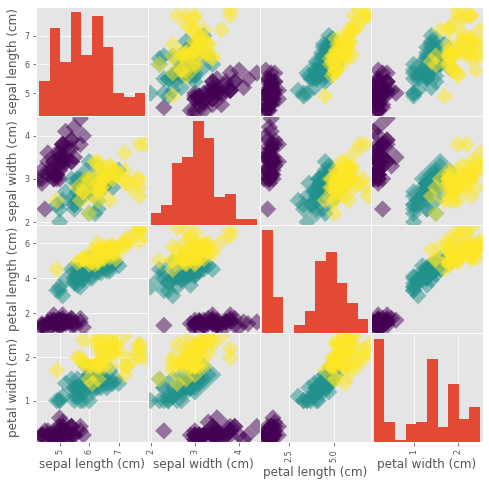

In [11]:
fig = pd.plotting.scatter_matrix( df, c=Y, figsize = [ 8,8 ], s=150, marker = 'D' )

the figure above has a lot of information. Example:
* some features such as `petal_width` and `petal_length` are highly correlated
* datapoints for target categories cluster tightly together

In [56]:
votes_url = 'https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv'
cnames = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
          'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
          'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df = pd.read_csv( votes_url, header=None )
df.columns = cnames
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [23]:
print( df.shape )
print( df.describe )
print( df.info )

(435, 17)
<bound method NDFrame.describe of           party infants water budget physician salvador religious satellite  \
0    republican       n     y      n         y        y         y         n   
1    republican       n     y      n         y        y         y         n   
2      democrat       ?     y      y         ?        y         y         n   
3      democrat       n     y      y         n        ?         y         n   
4      democrat       y     y      y         n        y         y         n   
..          ...     ...   ...    ...       ...      ...       ...       ...   
430  republican       n     n      y         y        y         y         n   
431    democrat       n     n      y         n        n         n         y   
432  republican       n     ?      n         y        y         y         n   
433  republican       n     n      n         y        y         y         ?   
434  republican       n     y      n         y        y         y         n   

    aid

In [57]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [55]:
df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
dtype: object

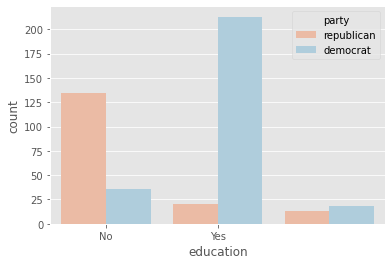

In [36]:
import seaborn as sns
plt.figure()
sns.countplot( x = 'education', hue = 'party', data = df, palette = 'RdBu' )
plt.xticks( [ 0,1 ], [ 'No', 'Yes' ] )
plt.show()

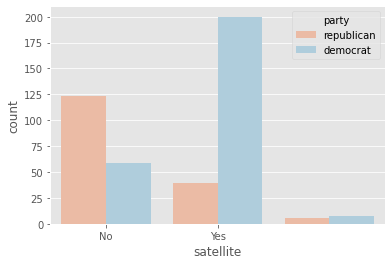

In [38]:
plt.figure()
sns.countplot( x = 'satellite', hue = 'party', data = df, palette = 'RdBu' )
plt.xticks( [ 0,1 ], [ 'No', 'Yes' ] )
plt.show()

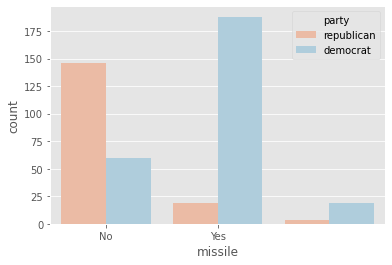

In [39]:
plt.figure()
sns.countplot( x = 'missile', hue = 'party', data = df, palette = 'RdBu' )
plt.xticks( [ 0,1 ], [ 'No', 'Yes' ] )
plt.show()

### The Classification Challenge

#### k-Nearest Neighbors (KNN)
* Basic idea: Predict the label of a data point by:
    + Looking at the 'k' closest labeled data points
    + Taking a majority vote
* KNN creates a set of decision boundaries to predict labels for future data

####  `sckit-learn` fit and predict
* All machine learning models are implemented as `Python` classes
    + They implement the algorithms for learning and predicting
    + Store the information learned from the data
* Training a model on the labeled data = 'fitting' a model
    + `.fit()` method
* Testing a model on new unlabeled data = 'predicting' a model
    + `.predict()`

#### Using `scikit-learn` to fit a classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn6 = KNeighborsClassifier( n_neighbors = 6 )
knn6.fit( iris[ 'data' ], iris[ 'target' ] )

KNeighborsClassifier(n_neighbors=6)

#### Predicting on Unlabeled Data

In [48]:
X_new = np.array( [ [5.6, 2.8, 3.9, 1.1],
                   [5.7, 2.6, 3.8, 1.3],
                   [4.7, 3.2, 1.3, 0.2] ] ) 
prediction = knn6.predict( X_new )
X_new.shape

(3, 4)

In [49]:
prediction

array([1, 1, 0])

### Measuring Model Performance

#### Model Accuracy
* In classification, accuracy is a commonly used metric
* Accuracy = Fraction of correct predictions
* Which data should be used to compute accuracy?
    + Data used for fit: would not be indicative of the models ability to generalize to new data
    + Split labeled data set in train/test subsets:
        * Train: to fit the model
        * Test: to evaluate the models performance
        
Use `train_test_split` to split the labeled dataset

In [67]:
 iris[ 'data' ].shape

(150, 4)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  iris[ 'data' ], iris[ 'target' ] , test_size = 0.3, random_state=21, stratify=iris[ 'target' ]  )

In [70]:
knn = KNeighborsClassifier( n_neighbors = 8 )
knn.fit( X_train, y_train )
y_pred = knn.predict( X_test )
print( 'Test set predictions:\\n {}'.format( y_pred ) )

Test set predictions:\n [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [71]:
knn.score( X_test, y_test )

0.9555555555555556

#### Model Complexity
* Larger k = smoother decision bundary = less complex model
    + more robust to noise in the data
    + however, if k is too large, leads to **underfitting**
* Smaller k = more jagged decision bounday = complex model
    + more sensitive to noise in the data and can lead to **overfitting**
* There is a model specific sweet spot for the best k to fit the data that can be found iteratively

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

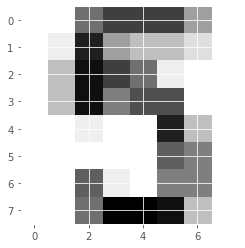

In [73]:
# Import necessary modules
#from sklearn import datasets
#import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [74]:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier( n_neighbors = 7 )

# Fit the classifier to the training data
knn.fit( X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


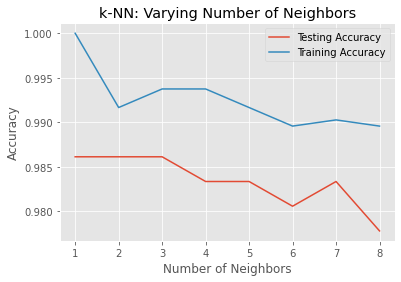

In [75]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier( n_neighbors = k )

    # Fit the classifier to the training data
    knn.fit( X_train, y_train )
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score( X_train, y_train )

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score( X_test, y_test )

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


## Regression

### Introduction to Regression

In [76]:
boston_url = 'https://assets.datacamp.com/production/repositories/628/datasets/021d4b9e98d0f9941e7bfc932a5787b362fafe3b/boston.csv'
boston = pd.read_csv( boston_url )
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Creating Feature and Target Arrays
* target = MEDV, or Median Value
* all other columns are features

In [77]:
X = boston.drop( 'MEDV', axis=1 ).values #drop MEDV
y = boston['MEDV'].values #select MEDV

#### Predicting house value froma single feature

In [78]:
X_rooms = X[:,5]
type( X_rooms ), type( y )

(numpy.ndarray, numpy.ndarray)

In [79]:
y = y.reshape( -1,1 )
X_rooms = X_rooms.reshape( -1,1 )

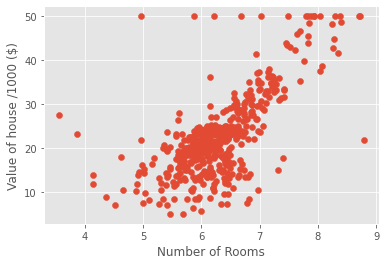

In [80]:
plt.scatter( X_rooms,y )
plt.ylabel( 'Value of house /1000 ($)' )
plt.xlabel( 'Number of Rooms' )
plt.show()

#### Fitting a Regression Model
More rooms have a higher price value

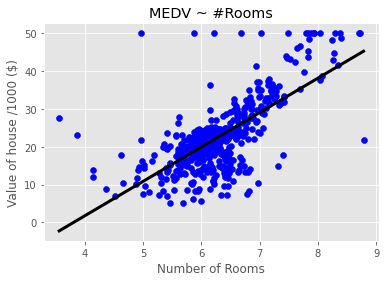

In [84]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit( X_rooms, y )
prediction_space = np.linspace( min( X_rooms ), max( X_rooms ) ).reshape( -1,1 )
plt.scatter( X_rooms, y, color = 'blue' )
plt.plot( prediction_space, reg.predict( prediction_space ), color='black', linewidth=3 )
plt.ylabel( 'Value of house /1000 ($)' )
plt.xlabel( 'Number of Rooms' )
plt.title( 'MEDV ~ #Rooms')
plt.show()

In [85]:
gmdr_url = 'https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv'
df = pd.read_csv( gmdr_url )
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [86]:
# Import numpy and pandas
#import numpy as np
#import pandas as pd

# Create arrays for features and target variable
y = df[ 'life' ].values
X = df[ 'fertility' ].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape( -1,1 )
X = X.reshape( -1,1 )

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


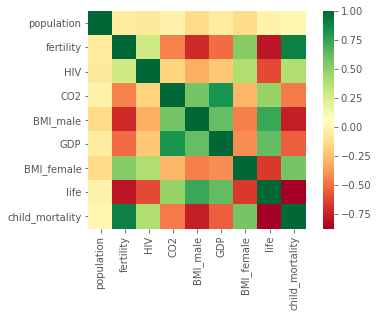

In [88]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn');

### The Basics of Linear Regression

#### Regression Mechanics

* y = ax + b
    + y = target
    + x = a single feature
    + a,b = parameters of model
* How do we chose a and b?
* define an error function for any given line
    + choose the time that minimizes the error function

#### The Loss Function
One approach: minimize the residuals (vertical distance from the data point and the fit line)
**OLS**: Ordinary Least Squares: minimize the sum of squares of the residuals

#### Linear Regression in Higher Dimensions
$y = a_1x_2 + a_2x_2 + b$
* To fit a linear regression model here:
    + Need to specify 3 variables
* In higher dimensions:  
    + Need to specify coefficient for each feature and the variable b  
$y = a_1x_1 + a_2x_2 + a_3x_3 + \ldots + a_nx_n + b$
* `scikit-learn` API works the same way:
    + Pass two arrays: Features and target

In [92]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=42 )
reg_all = LinearRegression()
reg_all.fit( X_train, y_train )
y_pred = reg_all.predict( X_test )

In [93]:
reg_all.score( X_test, y_test )

0.7298987360907498

0.6192442167740035


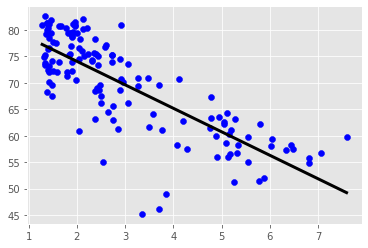

In [95]:
# Import LinearRegression
#from sklearn.linear_model import LinearRegression

# Create arrays for features and target variable
y = df[ 'life' ].values
X_fertility = df[ 'fertility' ].values
y = y.reshape( -1,1 )
X_fertility = X_fertility.reshape( -1,1 )

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit( X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict( prediction_space )

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter( X_fertility, y, color = 'blue' )
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


In [97]:
X = df.drop( ['life','Region'], axis=1 ).values

(139, 8)

In [98]:
# Import necessary modules
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit( X_train, y_train )

# Predict on the test data: y_pred
y_pred = reg_all.predict( X_test )

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error( y_test, y_pred ))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


### Cross-validation

#### Cross-validation Motivation
* Model performance is dependent on the way the data was split
* Not representative of the model's ability to generalize
* Solution: Cross-validation!
* 'k' fold CV:
    + divide the data in 'k' folds or subsets
    + train on k-1 folds and test with the kth
    + repeat the process giving each fold a chance to be the test
    + compute stats on the model metrics
* More folds == more computationally expensive

#### Cross-validation in `scikit-learn`

In [99]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cv_results = cross_val_score( reg, X, y, cv=5 )
print( cv_results )

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


In [101]:
np.mean( cv_results )

0.859962772279345

In [102]:
# Perform 3-fold CV
cvscores_3 = cross_val_score( reg, X, y, cv=3 )
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score( reg, X, y, cv=10 )
print(np.mean(cvscores_10))

0.8718712782622262
0.8436128620131267


### Regularized Regression

#### Why Regularize?
* Recall: Linear regression minimizes a loss function
* It chooses a coefficient for each feature variable
* Large coefficients can lead to overfitting
* Regularization: alter the loss function to penalize large coefficients

#### Ridge Regression
$$\mbox{Ridge Reg. Loss} = \mbox{OLS Loss} + \alpha*\sum_{i=1}^{n}a_i^2$$
* where the new term == the sum of square of each coeff multiplied by a constant
* $\alpha$ is a parameter we need to choose
* this approach penalizes the model for outliers (+ or -)

**Hyperparameter Tuning**: Picking $\alpha$ is similar to picking k in k-NN.  

* $\alpha$ controls the model complexity:
    + $\alpha = 0$: We get back OLS which does not penalize large coefficients and can lead to overfitting
    + Large $\alpha$ places a big penalty on large coefficients can lead to underfitting

In [104]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=42)
ridge = Ridge( alpha= 0.1, normalize=True )
ridge.fit( X_train, y_train )
ridge_pred = ridge.predict( X_test )
ridge.score( X_test, y_test )

0.8442469959975749

#### Lasso Regression
$$\mbox{Lasso Loss} = \mbox{OLS Loss} + \alpha*\sum_{i=1}^{n}|a_i|$$

In [105]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=42)
lasso = Lasso( alpha= 0.1, normalize=True )
lasso.fit( X_train, y_train )
lasso_pred = lasso.predict( X_test )
lasso.score( X_test, y_test )

0.8721296169613542

#### Lasso egression for Feature Selection
* Lasso Regression can be used to select iportant features of a dataset
* Lasso Reg. tends to shrink the coefficients of less important features to exactly 0

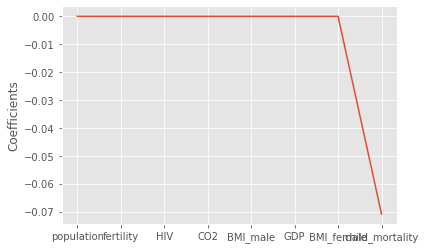

In [115]:
X_names = df.drop( ['life','Region'], axis=1 ).columns
lasso = Lasso( alpha= 0.4, normalize=True )
lasso_coeff = lasso.fit( X,y ).coef_
_ = plt.plot( range( len( X_names ) ), lasso_coeff )
_ = plt.xticks( range( len( X_names ) ), X_names )
_ = plt.ylabel( 'Coefficients' )
plt.show()

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.  

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as $L_1$ regularization because the regularization term is the $L_1$ norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the $L_2$ norm.

In [116]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

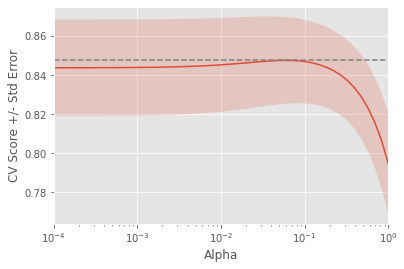

In [117]:
# Import necessary modules
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha 
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score( ridge, X, y, cv=10 )
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


## Fine-tuning your model

## Preprocessing and pipelines